# NYC Taxi Analysis

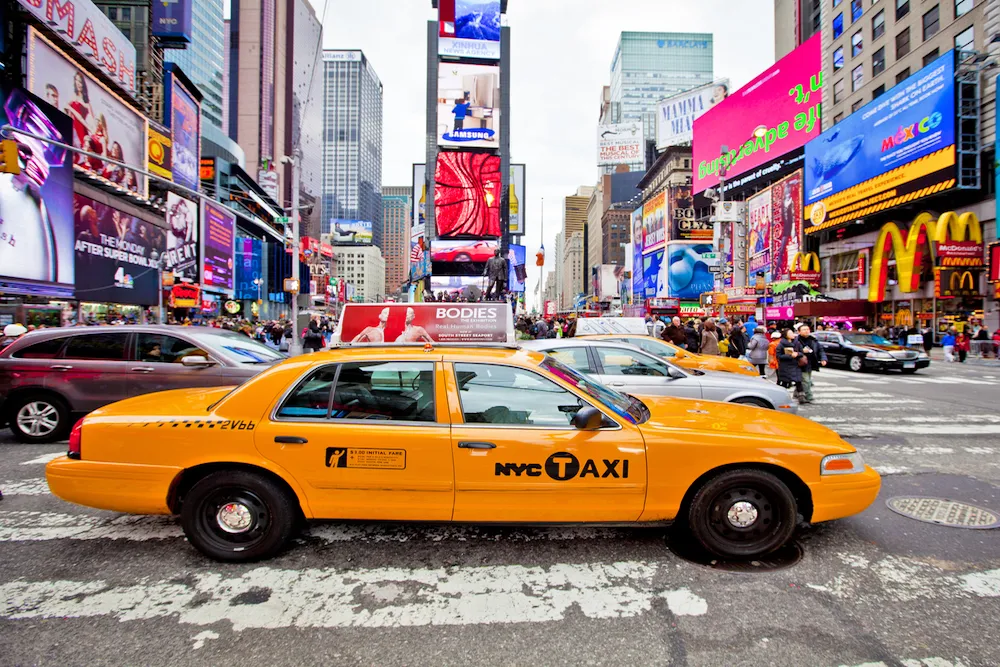


**VendorID**: A code indicating the TPEP provider that provided the record.
* **1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.**

**tpep_pickup_datetime**: The date and time when the meter was engaged.

**tpep_dropoff_datetime**: The date and time when the meter was disengaged.

**Passenger_count**: The number of passengers in the vehicle.
                    * This is a driver-entered value.

**Trip_distance**: The elapsed trip distance in miles reported by the taximeter.

**PULocationID**: TLC Taxi Zone in which the taximeter was engaged

**DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged

**RateCodeID**: The final rate code in effect at the end of the trip.
* 1= Standard rate
* 2=JFK
* 3=Newark
* 4=Nassau or Westchester
* 5=Negotiated fare
* 6=Group ride**
 
**Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle
                        memory before sending to the vendor, aka “store and forward,”
                        because the vehicle did not have a connection to the server.
                        **Y= store and forward trip**
                        **N= not a store and forward trip**
                        
**Payment_type**: A numeric code signifying how the passenger paid for the trip.
* 1= Credit card
* 2= Cash
* 3= No charge
* 4= Dispute
* 5= Unknown
* 6= Voided trip

**Fare_amount**: The time-and-distance fare calculated by the meter.

**Extra**: Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges.

**MTA_tax**: usd0.50 MTA tax that is automatically triggered based on the metered
rate in use

**Improvement_surcharge**: usd 0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015.

**Tip_amount**: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

**Tolls_amount**: Total amount of all tolls paid in trip.

**Total_amount**: The total amount charged to passengers. Does not include cash tips.

**Congestion_Surcharge**: Total amount collected in trip for NYS congestion surcharge.

**Airport_fee**: $ 1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [2]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,plot_tree

In [5]:
os.chdir(r"C:\Users\aswq\pga\Machine Learning")

In [1]:
# os.listdir()

In [6]:
df_data=pd.read_parquet("yellow_tripdata_2022-06.parquet")

In [7]:
df_data.shape

(3558124, 19)

This data has 35,58,124 **rows** and 19 **columns**

In [8]:
df,_=train_test_split(df_data,test_size=.5,random_state=0)

We are taking 50 %

In [9]:
df.shape

(1779062, 19)

In [10]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
78225,1,2022-06-01 17:53:10,2022-06-01 19:25:23,1.0,21.80,1.0,N,231,179,1,73.5,3.5,0.5,0.00,0.00,0.3,77.80,2.5,0.0
615735,2,2022-06-06 13:54:34,2022-06-06 14:06:01,1.0,2.17,1.0,N,237,238,1,10.0,0.0,0.5,3.33,0.00,0.3,16.63,2.5,0.0
698378,2,2022-06-07 08:24:59,2022-06-07 08:37:48,4.0,1.82,1.0,N,68,158,1,10.0,0.0,0.5,2.66,0.00,0.3,15.96,2.5,0.0
3243871,2,2022-06-29 12:59:58,2022-06-29 13:09:20,1.0,2.42,1.0,N,236,74,1,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5,0.0
2523598,2,2022-06-22 20:31:18,2022-06-22 20:47:48,2.0,3.65,1.0,N,68,231,1,15.0,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,1.0,N,263,234,1,17.0,0.0,0.5,2.00,0.00,0.3,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,1.0,N,48,246,1,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,1.0,N,140,138,1,25.5,2.5,0.5,5.30,6.55,0.3,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,1.0,N,230,163,2,5.0,1.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0


In [11]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          66426
trip_distance                0
RatecodeID               66426
store_and_fwd_flag       66426
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     66426
airport_fee              66426
dtype: int64

* Missing Values :**passenger_count**,**RatecodeID**,**store_and_fwd_flag**,**congestion_surcharge**,**airport_fee**
* As we can see the missing value amount is same for these 4 variables  
 - We can assume that where passenger_count is empty the others are empty at the same place

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,1779062.0,1.713946,0.487949,1.00,1.00,2.00,2.00,6.00
passenger_count,1712636.0,1.399446,0.960739,0.00,1.00,1.00,1.00,9.00
trip_distance,1779062.0,6.810798,708.353758,0.00,1.14,1.93,3.67,307007.11
RatecodeID,1712636.0,1.417881,5.700430,1.00,1.00,1.00,1.00,99.00
PULocationID,1779062.0,164.542258,65.539746,1.00,132.00,162.00,234.00,265.00
DOLocationID,1779062.0,162.341763,70.185367,1.00,113.00,162.00,234.00,265.00
payment_type,1779062.0,1.182113,0.511085,0.00,1.00,1.00,1.00,4.00
fare_amount,1779062.0,15.142205,31.650172,-907.00,7.00,10.50,17.00,7037.50
extra,1779062.0,1.021649,1.255042,-4.50,0.00,0.50,2.50,8.25
mta_tax,1779062.0,0.488362,0.094050,-0.50,0.50,0.50,0.50,3.30


* As we can see the diffrence between **std** and **mean** we can conclude that there are some outliers 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779062 entries, 78225 to 305711
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee        

* **tpep_pickup_datetime**  and **tpep_dropoff_datetime** are datetime format

In [14]:
df["VendorID"].value_counts()

2    1255085
1     520962
6       3009
5          6
Name: VendorID, dtype: int64

# Univariate Analysis

In [15]:
def univariate_cat(data,x):  
    missing=data[x].isnull().sum()  
    unique_cnt=data[x].nunique()  
    unique_cat=list(data[x].unique())  
    f1=pd.DataFrame(data[x].value_counts(dropna=False))  
    f1.rename(columns={x:'count'},inplace=True)  
    f2=pd.DataFrame(data[x].value_counts(normalize=True))  
    f2.rename(columns={x:'percentage'},inplace=True)  
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'  
    ff=pd.concat([f1,f2],axis=1)  
    print(f"Total missing values : {missing}\n")  
    print(f"Total count of unique categories: {unique_cnt}\n")  
    print(f"Unique categories :\n{unique_cat}")  
    print(f'Value count and %\n:',ff) 
    sns.countplot(data=data,x=x) 
    plt.show()
### THIS FUNCTION WILL HELP TO TO HALF OF WORK IN ONE GO

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 6, 5]
Value count and %
:      count percentage
2  1255085     70.55%
1   520962     29.28%
6     3009      0.17%
5        6       0.0%


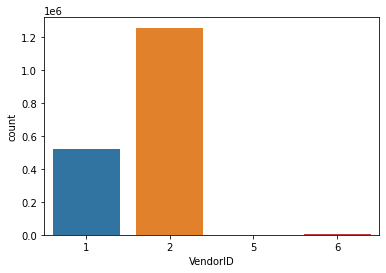

In [16]:
univariate_cat(data=df,x="VendorID")

* There are no **Missing values** 
* There are 4 categories [1,2,6,5]
* 6 and 5 are lowest and don't have information about them we can treat them as **others** 

In [17]:
df.dtypes.index

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [18]:
df["VendorID"]=df["VendorID"].replace([6,5],"others")

we are replacing it with others because we don't have information about them 

In [19]:
df["VendorID"].value_counts()

2         1255085
1          520962
others       3015
Name: VendorID, dtype: int64

Total missing values : 66426

Total count of unique categories: 2

Unique categories :
['N', None, 'Y']
Value count and %
:         count percentage
N     1690451      98.7%
None    66426        NaN
Y       22185       1.3%


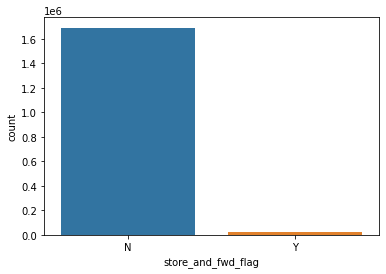

In [20]:
univariate_cat(data=df,x="store_and_fwd_flag")

* There are Missing Values 
* Total categories are 2
* A none column We are replacing it by other

In [21]:
df["store_and_fwd_flag"]=df["store_and_fwd_flag"].replace(np.nan,"other")

In [22]:
df["store_and_fwd_flag"].isnull().sum()

0

In [23]:
df["RatecodeID"].value_counts()

1.0     1613702
2.0       70226
5.0       14985
99.0       5789
3.0        5640
4.0        2280
6.0          14
Name: RatecodeID, dtype: int64

In [24]:
### It is according to data dictionary
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

In [25]:
df["RatecodeID"]=df["RatecodeID"].map({1:"Standard_rate",
                                       2:"JFK",
                                       3:"Newark",
                                       4:"Nassau_or_Westchester",
                                       5:"Negotiated_fare",
                                       9:"Group_ride",
                                       99:"other"})

* We have convert the ordinal into categorical 

In [26]:
df["RatecodeID"].value_counts()

Standard_rate            1613702
JFK                        70226
Negotiated_fare            14985
other                       5789
Newark                      5640
Nassau_or_Westchester       2280
Name: RatecodeID, dtype: int64

In [27]:
df["RatecodeID"]=df["RatecodeID"].replace(np.nan,"other")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['Standard_rate', 'other', 'JFK', 'Newark', 'Nassau_or_Westchester', 'Negotiated_fare']
Value count and %
:                          count percentage
Standard_rate          1613702     90.71%
other                    72229      4.06%
JFK                      70226      3.95%
Negotiated_fare          14985      0.84%
Newark                    5640      0.32%
Nassau_or_Westchester     2280      0.13%


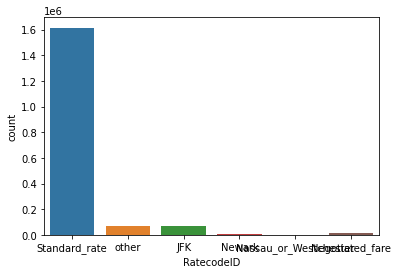

In [28]:
univariate_cat(data=df,x="RatecodeID")

In [29]:
df["payment_type"].value_counts()

1    1347277
2     348675
0      66426
4       8374
3       8310
Name: payment_type, dtype: int64

In [30]:
df["payment_type"]=df["payment_type"].map({1:"Credit_card",
                                           2:"Cash",
                                           3:"No_charge",
                                           4:"Dispute",
                                           0:"Unknown"})

In [31]:
df["payment_type"].value_counts() ## checking how many count a variable has

Credit_card    1347277
Cash            348675
Unknown          66426
Dispute           8374
No_charge         8310
Name: payment_type, dtype: int64

Total missing values : 0

Total count of unique categories: 5

Unique categories :
['Credit_card', 'Cash', 'Unknown', 'No_charge', 'Dispute']
Value count and %
:                count percentage
Credit_card  1347277     75.73%
Cash          348675      19.6%
Unknown        66426      3.73%
Dispute         8374      0.47%
No_charge       8310      0.47%


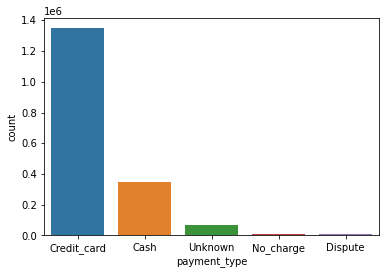

In [32]:
univariate_cat(data=df,x="payment_type")

# Univariate on Numerical

In [33]:
def univariate_num(data,x): 
    missing=data[x].isnull().sum() 
    min1=round(data[x].min(),2) 
    max1=round(data[x].max(),2) 
    mean=round(data[x].mean(),2) 
    var=round(data[x].var(),2) 
    std=round(data[x].std(),2) 
    range1=round(max1-min1,2) 
    q1=round(data[x].quantile(.25),2) 
    q2=round(data[x].quantile(.50),2) 
    q3=round(data[x].quantile(.75),2) 
    skew=round(data[x].skew(),2) 
    kurt=round(data[x].kurt(),2) 
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1, 
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt} 
#     sns.histplot(data[x],kde=True) 
#     plt.show() 
#     sns.boxplot(data=data,y=data[x]) 
#     plt.show() 
    return myvalue
###this function is for numerical columns like int and float

In [34]:
univariate_num(data=df,x="passenger_count")

{'missing': 66426,
 'min': 0.0,
 'max': 9.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 9.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.72,
 'Kurtosis': 8.25}

* There are **ouliers**
* There are **missing values**


In [35]:
univariate_num(data=df,x="passenger_count")

{'missing': 66426,
 'min': 0.0,
 'max': 9.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 9.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.72,
 'Kurtosis': 8.25}

In [36]:
df.drop(columns=["DOLocationID","PULocationID"],inplace=True)

In [37]:
univariate_num(data=df,x="trip_distance")

{'missing': 0,
 'min': 0.0,
 'max': 307007.11,
 'mean': 6.81,
 'var': 501765.05,
 'std': 708.35,
 'range': 307007.11,
 'q1': 1.14,
 'q2': 1.93,
 'q3': 3.67,
 'skewness': 275.94,
 'Kurtosis': 87878.3}

In [38]:
univariate_num(data=df,x="fare_amount")

{'missing': 0,
 'min': -907.0,
 'max': 7037.5,
 'mean': 15.14,
 'var': 1001.73,
 'std': 31.65,
 'range': 7944.5,
 'q1': 7.0,
 'q2': 10.5,
 'q3': 17.0,
 'skewness': 174.11,
 'Kurtosis': 38233.61}

In [39]:
df1=df[df["fare_amount"]>2.5]

We take fare_amount which is atleast greater than 2.5 because it is minimum Fare of New-york 

In [40]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
78225,1,2022-06-01 17:53:10,2022-06-01 19:25:23,1.0,21.80,Standard_rate,N,Credit_card,73.5,3.5,0.5,0.00,0.00,0.3,77.80,2.5,0.0
615735,2,2022-06-06 13:54:34,2022-06-06 14:06:01,1.0,2.17,Standard_rate,N,Credit_card,10.0,0.0,0.5,3.33,0.00,0.3,16.63,2.5,0.0
698378,2,2022-06-07 08:24:59,2022-06-07 08:37:48,4.0,1.82,Standard_rate,N,Credit_card,10.0,0.0,0.5,2.66,0.00,0.3,15.96,2.5,0.0
3243871,2,2022-06-29 12:59:58,2022-06-29 13:09:20,1.0,2.42,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5,0.0
2523598,2,2022-06-22 20:31:18,2022-06-22 20:47:48,2.0,3.65,Standard_rate,N,Credit_card,15.0,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,Credit_card,17.0,0.0,0.5,2.00,0.00,0.3,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,Credit_card,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,Credit_card,25.5,2.5,0.5,5.30,6.55,0.3,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,Cash,5.0,1.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0


In [41]:
univariate_num(data=df1,x="extra")

{'missing': 0,
 'min': 0.0,
 'max': 8.25,
 'mean': 1.03,
 'var': 1.57,
 'std': 1.25,
 'range': 8.25,
 'q1': 0.0,
 'q2': 0.5,
 'q3': 2.5,
 'skewness': 1.13,
 'Kurtosis': 0.71}

In [42]:
univariate_num(data=df1,x="mta_tax")

{'missing': 0,
 'min': -0.5,
 'max': 3.3,
 'mean': 0.49,
 'var': 0.0,
 'std': 0.05,
 'range': 3.8,
 'q1': 0.5,
 'q2': 0.5,
 'q3': 0.5,
 'skewness': -8.61,
 'Kurtosis': 127.21}

In [43]:
univariate_num(data=df1,x="tip_amount")

{'missing': 0,
 'min': -16.47,
 'max': 733.43,
 'mean': 2.82,
 'var': 11.12,
 'std': 3.33,
 'range': 749.9,
 'q1': 1.0,
 'q2': 2.2,
 'q3': 3.46,
 'skewness': 11.92,
 'Kurtosis': 1546.13}

In [44]:
univariate_num(data=df1,x="tolls_amount")

{'missing': 0,
 'min': 0.0,
 'max': 91.83,
 'mean': 0.57,
 'var': 4.29,
 'std': 2.07,
 'range': 91.83,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 4.71,
 'Kurtosis': 36.75}

<AxesSubplot:ylabel='tolls_amount'>

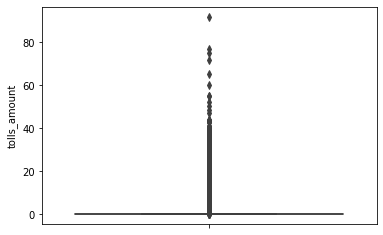

In [45]:
sns.boxplot(data=df1,y="tolls_amount")

In [46]:
univariate_num(data=df1,x="improvement_surcharge")

{'missing': 0,
 'min': 0.0,
 'max': 0.3,
 'mean': 0.3,
 'var': 0.0,
 'std': 0.0,
 'range': 0.3,
 'q1': 0.3,
 'q2': 0.3,
 'q3': 0.3,
 'skewness': -66.42,
 'Kurtosis': 4410.08}

In [47]:
df1[df1["improvement_surcharge"]==0].shape

(398, 17)

In [48]:
df1.drop(columns=["improvement_surcharge"],inplace=True)

C:\Users\aswq\AppData\Local\Temp\ipykernel_8028\2533592100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=["improvement_surcharge"],inplace=True)


In [49]:
univariate_num(data=df1,x="total_amount")

{'missing': 0,
 'min': 2.83,
 'max': 7060.85,
 'mean': 22.36,
 'var': 1117.66,
 'std': 33.43,
 'range': 7058.02,
 'q1': 12.36,
 'q2': 16.3,
 'q3': 23.75,
 'skewness': 149.82,
 'Kurtosis': 31092.34}

In [50]:
univariate_num(data=df1,x="congestion_surcharge")

{'missing': 66393,
 'min': 0.0,
 'max': 2.75,
 'mean': 2.32,
 'var': 0.42,
 'std': 0.65,
 'range': 2.75,
 'q1': 2.5,
 'q2': 2.5,
 'q3': 2.5,
 'skewness': -3.28,
 'Kurtosis': 8.76}

* There are Missing Values
* And outliers too

In [51]:
univariate_num(data=df1,x="airport_fee")

{'missing': 66393,
 'min': 0.0,
 'max': 1.25,
 'mean': 0.1,
 'var': 0.11,
 'std': 0.33,
 'range': 1.25,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 3.15,
 'Kurtosis': 7.95}

* There are Missing Values
* And outliers too

In [52]:
df1[df1["airport_fee"]==0].shape

(1559373, 16)

# Feaure Engineering 

In [53]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [54]:
df1["tpep_pickup_datetime"].min()

Timestamp('2002-10-21 00:13:16')

In [55]:
df1["tpep_pickup_datetime"].max()

Timestamp('2023-04-18 14:30:05')

In [56]:
df1["month"]=df1["tpep_pickup_datetime"].dt.month
df1["year"]=df1["tpep_pickup_datetime"].dt.year
df1["week_of_day"]=df1["tpep_pickup_datetime"].dt.dayofweek
df1["day"]=df1["tpep_pickup_datetime"].dt.day
df1["hours"]=df1["tpep_pickup_datetime"].dt.hour
df1["minute"]=df1["tpep_pickup_datetime"].dt.minute

C:\Users\aswq\AppData\Local\Temp\ipykernel_8028\1846386314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"]=df1["tpep_pickup_datetime"].dt.month
C:\Users\aswq\AppData\Local\Temp\ipykernel_8028\1846386314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"]=df1["tpep_pickup_datetime"].dt.year
C:\Users\aswq\AppData\Local\Temp\ipykernel_8028\1846386314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [57]:
df1["month"].value_counts()

6     1756967
10        194
5          19
7          12
1           4
12          1
4           1
Name: month, dtype: int64

In [58]:
df1["minute"].value_counts()

6     32599
44    29854
9     29707
8     29703
16    29651
53    29626
43    29624
12    29563
42    29556
40    29550
5     29527
49    29503
7     29485
11    29482
47    29472
45    29470
35    29465
46    29461
38    29447
51    29370
48    29367
14    29365
13    29346
50    29325
57    29322
24    29312
39    29293
56    29287
18    29245
3     29241
36    29223
52    29220
17    29213
37    29199
41    29189
22    29160
10    29159
19    29123
15    29122
59    29098
20    29096
54    29086
33    29068
55    29011
26    29010
58    29008
30    28983
2     28962
23    28953
32    28922
31    28915
4     28875
21    28866
25    28858
29    28818
34    28792
27    28784
0     28781
28    28767
1     28719
Name: minute, dtype: int64

In [59]:
df1["hours"].value_counts()

18    123965
17    115181
19    114727
15    106707
16    105418
14    105051
13     97901
20     97168
12     97113
21     96000
11     90946
22     87604
10     82708
9      75774
23     71666
8      68106
7      51545
0      50766
1      32609
6      28079
2      22284
3      14074
5      11847
4       9959
Name: hours, dtype: int64

In [60]:
df1["year"].value_counts()

2022    1756998
2002        194
2003          4
2008          1
2023          1
Name: year, dtype: int64

In [61]:
df1["week_of_day"].value_counts()

3    312686
2    307435
4    249477
1    241531
5    236710
0    215313
6    194046
Name: week_of_day, dtype: int64

In [62]:
df1["day"].value_counts()

9     65821
15    64529
23    64449
8     63911
16    63821
10    63808
7     62896
17    62182
2     62108
14    62078
3     61779
24    61693
22    60644
4     60475
1     60454
21    60445
11    59989
25    58998
13    58548
29    57919
18    57259
30    56485
28    56081
6     55258
27    51775
5     50299
20    49738
12    48982
19    48867
26    45887
31       20
Name: day, dtype: int64

In [63]:
df1=df1[df1["month"]==6]
df1=df1[df1["year"]==2022]

In [64]:
df1["week_of_day"].value_counts()

3    312659
2    307405
4    249435
1    241475
5    236690
0    215288
6    194015
Name: week_of_day, dtype: int64

In [65]:
df1["is_weekend"]=np.where(df1["week_of_day"].isin([5,6]),1,0)

In [66]:
df1["is_weekend"].value_counts()

0    1326262
1     430705
Name: is_weekend, dtype: int64

In [67]:
# 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
#        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
#        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
#        'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
#        'congestion_surcharge', 'airport_fee', 'month', 'year', 'week_of_day',
#        'day', 'hours', 'minute', 'is_weekend'

In [68]:
def day_cat(x):
    if x<=10:
        return "start_of_the_month"
    elif x>10 and x<=20:
        return "mid_of_the_month"
    else:
        return "end_of_the_month"

In [69]:
df1["day_cat"]=df1["day"].apply(lambda a: day_cat(a))

In [70]:
df1["hours"].value_counts()

18    123958
17    115173
19    114718
15    106695
16    105405
14    105039
13     97890
20     97154
12     97101
21     95991
11     90935
22     87599
10     82693
9      75761
23     71641
8      68095
7      51538
0      50747
1      32604
6      28078
2      22280
3      14073
5      11844
4       9955
Name: hours, dtype: int64

In [71]:
def hour_category(x):
    if x>=4 and x<8:
        return "early_morning"
    elif x>=8 and x<12:
        return "morning"
    elif x>=12 and x<16:
        return "afternoon"
    elif x>=16 and x<20:
        return "evening"
    elif x>=20 and x<24:
        return "night"
    elif x>=0 and x<4:
        return "midnight"
    else:
        return "unknown"
### Changing the category and minimizing the variables    

In [72]:
df1["hours_cat"]=df1["hours"].apply(lambda a: hour_category(a))

In [73]:
df1["duration"]=(df1["tpep_dropoff_datetime"]-df1["tpep_pickup_datetime"])*24

In [74]:
df1["duration"]

78225     1 days 12:53:12
615735    0 days 04:34:48
698378    0 days 05:07:36
3243871   0 days 03:44:48
2523598   0 days 06:36:00
                ...      
2249467   0 days 07:16:48
963395    0 days 03:40:00
2215104   0 days 06:30:00
1484405   0 days 01:40:24
305711    0 days 01:38:00
Name: duration, Length: 1756967, dtype: timedelta64[ns]

In [75]:
df1["fare_amount"]

78225      73.5
615735     10.0
698378     10.0
3243871     9.5
2523598    15.0
           ... 
2249467    17.0
963395      8.5
2215104    25.5
1484405     5.0
305711      5.0
Name: fare_amount, Length: 1756967, dtype: float64

In [76]:
def fare_cat(x):
    if x<=10:
        return "(0,10]"
    elif x>10 and x<=20:
        return "(10,20]"
    elif x>20 and x<=30:
        return "(20,30]"
    elif x>30 and x<=40:
        return "(30,40]"
    elif x>40 and x<=50:
        return "(40,50]"
    elif x>50 and x<=60:
        return "(50,60]"
    elif x>60 and x<=70:
        return "(60,70]"
    elif x>70 and x<=80:
        return "(70,80]"
    elif x>80 and x<=90:
        return "(80,90]"
    elif x>90 and x<=100:
        return "(90,100]"
    else:
        return "100+"
        
    

In [77]:
df1["fare_cat"]=df1["fare_amount"].apply(fare_cat)

<AxesSubplot:>

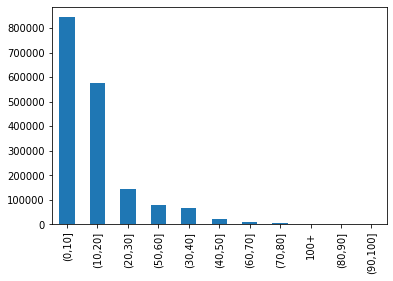

In [78]:
df1["fare_cat"].value_counts().plot(kind="bar")

In [79]:
df1["duration"]=((df1["tpep_dropoff_datetime"]-df1["tpep_pickup_datetime"])/pd.Timedelta(minutes=1))

In [80]:
df1["duration"].max()

5772.916666666667

In [81]:
df1["duration"].min()

-0.9666666666666667

<AxesSubplot:xlabel='duration', ylabel='Count'>

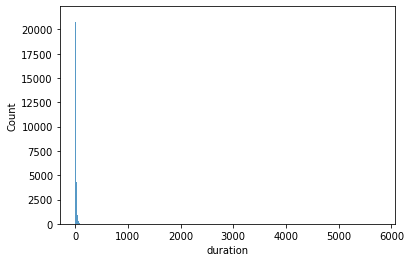

In [82]:
sns.histplot(data=df1,x="duration")

In [83]:
def duration_cat(x):
    if x<30:
        return "duration_bt_30m"
    elif x>=30 and x<60:
        return "duration _bt_30_60m"
    elif x>=60 and x<120:
        return "duration _bt_60_120m"
    else:
        return "duration_morethan_120m"
### changing into categorical 

In [84]:
df1["duration_cat"]=df1["duration"].apply(lambda y: duration_cat(y))

In [85]:
df1["duration_cat"].value_counts()

duration_bt_30m           1549666
duration _bt_30_60m        171573
duration _bt_60_120m        32928
duration_morethan_120m       2800
Name: duration_cat, dtype: int64

In [86]:
df1["airport_pickup"]=np.where(df1["airport_fee"]==0,0,1)

# Missing value Treatment

In [87]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          66426
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     66426
airport_fee              66426
dtype: int64

In [88]:
df2=df1.dropna()

In [89]:
df2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
day                      0
hours                    0
minute                   0
is_weekend               0
day_cat                  0
hours_cat                0
duration                 0
fare_cat                 0
duration_cat             0
airport_pickup           0
dtype: int64

#### Outliers Treatment

In [90]:
df2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,1690574.0,1.401171,0.962523,0.00,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00,2.00,3.00,4.000000,4.000000,5.000000,6.000000,9.000000
trip_distance,1690574.0,3.747107,164.684604,0.00,0.040000,0.340000,0.430000,0.500000,0.54,1.140000,1.900000,3.60,9.14,15.63,17.120000,17.900000,18.700000,20.270000,184340.800000
fare_amount,1690574.0,15.165229,32.145743,2.75,3.500000,4.000000,4.500000,4.500000,4.50,7.000000,10.500000,16.50,31.50,52.00,52.000000,52.000000,52.000000,61.500000,7037.500000
extra,1690574.0,1.070272,1.262478,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.500000,2.50,3.00,3.50,3.500000,3.500000,3.500000,3.750000,8.250000
mta_tax,1690574.0,0.494818,0.051170,0.00,0.000000,0.500000,0.500000,0.500000,0.50,0.500000,0.500000,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,3.300000
tip_amount,1690574.0,2.775952,3.322791,0.00,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,2.160000,3.36,5.70,9.37,10.090000,11.870000,12.600000,14.960000,733.430000
tolls_amount,1690574.0,0.562921,2.054199,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,6.55,6.550000,6.550000,6.550000,6.550000,91.830000
total_amount,1690574.0,22.082859,33.859818,2.83,7.300000,8.150000,8.300000,8.800000,9.30,12.350000,15.960000,23.16,43.80,63.10,67.850000,73.100000,75.720000,81.100000,7060.850000
congestion_surcharge,1690574.0,2.317384,0.650531,0.00,0.000000,0.000000,0.000000,0.000000,0.00,2.500000,2.500000,2.50,2.50,2.50,2.500000,2.500000,2.500000,2.500000,2.750000
airport_fee,1690574.0,0.097154,0.334670,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,1.25,1.250000,1.250000,1.250000,1.250000,1.250000


In [91]:
df2.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace=True)

C:\Users\aswq\AppData\Local\Temp\ipykernel_8028\1849300624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace=True)


In [92]:
obj_var=df2.dtypes[df2.dtypes=="object"].index

In [93]:
df_obj=df2[obj_var]

In [94]:
num_var=df2.dtypes[df2.dtypes!="object"].index

In [95]:
df_num=df2[num_var]

In [96]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [97]:
df_num1=df_num.apply(outliers_percentile)

In [98]:
df_num1.describe(percentiles=[.01,.02,.03,.04,.05,.25,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,1690574.0,1.401148,0.962385,0.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00,2.00,3.00,4.000000,4.000000,5.000000,6.000000,6.000000
trip_distance,1690574.0,3.531105,4.310845,0.040000,0.040000,0.340000,0.430000,0.500000,0.54,1.140000,1.900000,3.60,9.14,15.63,17.120000,17.900000,18.700000,20.270000,20.270000
fare_amount,1690574.0,14.801332,12.444387,3.500000,3.500000,4.000000,4.500000,4.500000,4.50,7.000000,10.500000,16.50,31.50,52.00,52.000000,52.000000,52.000000,61.500000,61.500000
extra,1690574.0,1.057292,1.220820,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.500000,2.50,3.00,3.50,3.500000,3.500000,3.500000,3.750000,3.750000
mta_tax,1690574.0,0.494799,0.050731,0.000000,0.000000,0.500000,0.500000,0.500000,0.50,0.500000,0.500000,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,1690574.0,2.729078,2.896977,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,2.160000,3.36,5.70,9.37,10.090000,11.870000,12.600000,14.960000,14.960000
tolls_amount,1690574.0,0.517154,1.763651,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,6.55,6.550000,6.550000,6.550000,6.550000,6.550000
total_amount,1690574.0,21.694817,15.909375,7.300000,7.300000,8.150000,8.300000,8.800000,9.30,12.350000,15.960000,23.16,43.80,63.10,67.850000,73.100000,75.720000,81.100000,81.100000
congestion_surcharge,1690574.0,2.317383,0.650530,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,2.500000,2.500000,2.50,2.50,2.50,2.500000,2.500000,2.500000,2.500000,2.500000
airport_fee,1690574.0,0.097154,0.334670,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,1.25,1.250000,1.250000,1.250000,1.250000,1.250000


In [99]:
df3=pd.concat([df_num1,df_obj],axis=1)

## Multicollinearty

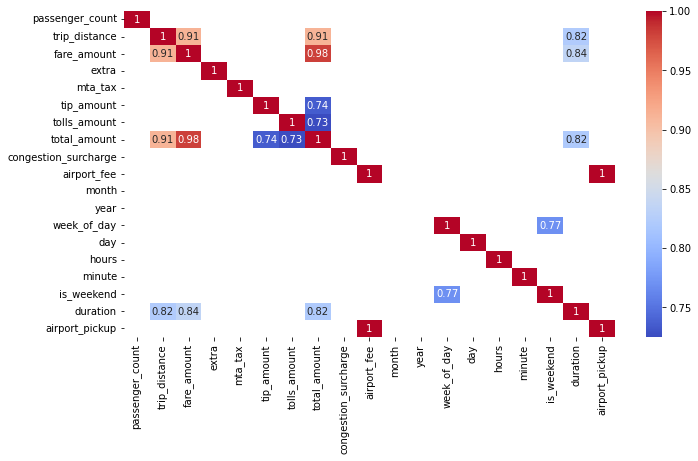

In [100]:
cr=df3.corr()
cr1=cr[abs(cr)>.7]
plt.figure(figsize=(11,6))
sns.heatmap(cr1,annot=True,cmap="coolwarm")
plt.show()

In [101]:
df3.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'month', 'year', 'week_of_day', 'day', 'hours', 'minute',
       'is_weekend', 'duration', 'airport_pickup', 'VendorID', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'day_cat', 'hours_cat',
       'fare_cat', 'duration_cat'],
      dtype='object')

In [102]:
df3.drop(columns=["airport_fee","week_of_day"],inplace=True)

In [103]:
df3.drop(columns=["fare_cat"],inplace=True)

In [104]:
df3.drop(columns=["fare_amount"],inplace=True)

***
*Here we drop **fare_amount** because the correlation of this variable with Target Variable **total_amount** is very high 
***

### Dummy creation

In [105]:
df4=pd.get_dummies(data=df3,drop_first=True)

C:\Users\aswq\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


## Normality Check

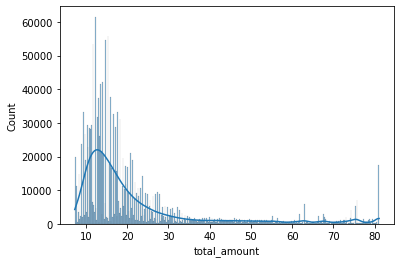

In [106]:
sns.histplot(df4["total_amount"],kde=True)
plt.show()

In [107]:
from scipy.stats import jarque_bera
jarque_bera(df3["total_amount"])

Jarque_beraResult(statistic=2612253.6189737255, pvalue=0.0)

<AxesSubplot:xlabel='total_amount', ylabel='Count'>

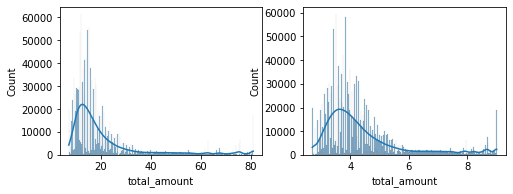

In [108]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df3["total_amount"],kde=True)
plt.subplot(222)
sns.histplot(np.sqrt(df3["total_amount"]),kde=True)

In [109]:
jarque_bera(np.sqrt(df3["total_amount"]))

Jarque_beraResult(statistic=1046092.9980539936, pvalue=0.0)

Jarque_beraResult(statistic=335949.64319669234, pvalue=0.0)


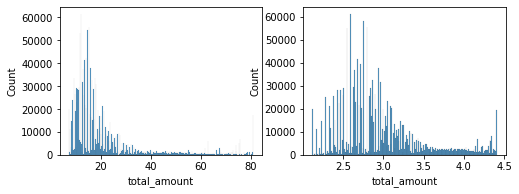

In [110]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df3["total_amount"])
plt.subplot(222)
sns.histplot(np.log1p(df3["total_amount"]))
print(jarque_bera(np.log1p(df3["total_amount"])))

***
* This data can't be normalize So, we have to use **SGDRegressor** 
* But before that we are triyng to run **Linear Regression**
***

### Linear reggression

In [111]:
from sklearn.model_selection import train_test_split  # Train test split
from sklearn.linear_model import LinearRegression     # Model development
from sklearn import metrics 

In [112]:
y=df4["total_amount"]
x=df4.drop(columns=["total_amount"])

In [113]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, 
                                                  random_state=0)

In [114]:
regl=LinearRegression()
regl.fit(x_train,y_train)

LinearRegression()

In [115]:
print("Train R^2",regl.score(x_train,y_train))

Train R^2 0.9540880616604118


In [116]:
print("Test R^2",regl.score(x_test,y_test))

Test R^2 0.9551738335671441


In [117]:
0.9551738335671441-0.9540880616604118

0.0010857719067323135

***
**R^2**=It is showing **How much percent of variance can be explained by this model**
***

In [118]:
pred_test=regl.predict(x_test)

In [119]:
pred_train=regl.predict(x_train)

In [120]:
print("Train MSE",np.mean((pred_train-y_train)**(2)))
print("Train RMSE",np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",np.mean(np.abs((pred_train-y_train))))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 11.621219056224136
Train RMSE 3.4089909146584914
Train MAE 1.2547099044937806
Train MAPE 0.05267301178540108


In [121]:
print("Test MSE",np.mean((pred_test-y_test)**(2)))
print("Test RMSE",np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",np.mean(np.abs((pred_test-y_test))))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 11.344289460773632
Test RMSE 3.3681284804433504
Test MAE 1.246880613271664
Test MAPE 0.05240812065572668


<AxesSubplot:>

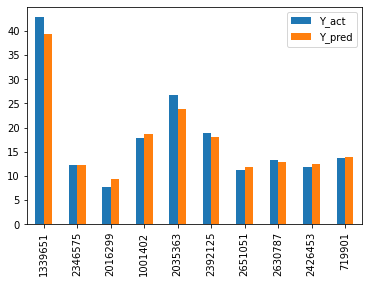

In [122]:
gh=pd.DataFrame({'Y_act':y_train, 'Y_pred': pred_train})
gh.head(10).plot(kind='bar')

***
The Result of linear Regression is good 
***

# SGDRegressor

In [123]:
from sklearn.preprocessing import MinMaxScaler


In [124]:
mn=MinMaxScaler()
mn.fit(x_train)

MinMaxScaler()

In [125]:
x_train_trans=mn.transform(x_train)
x_test_trans=mn.transform(x_test)

In [126]:
x_train_trans

array([[0.16666667, 0.51853683, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 0.04349975, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 0.0257044 , 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.16666667, 0.08156204, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.2056352 , 0.26666667, ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 0.04349975, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [127]:
x_train_trans_df=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_train_trans_df.head(2)

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,congestion_surcharge,month,year,day,...,day_cat_mid_of_the_month,day_cat_start_of_the_month,hours_cat_early_morning,hours_cat_evening,hours_cat_midnight,hours_cat_morning,hours_cat_night,duration_cat_duration _bt_60_120m,duration_cat_duration_bt_30m,duration_cat_duration_morethan_120m
0,0.166667,0.518537,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.379310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.166667,0.043500,0.0,1.0,0.137701,0.0,1.0,0.0,0.0,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
from sklearn.linear_model import SGDRegressor

In [129]:
sgd=SGDRegressor(loss="squared_error" , epsilon=0.01, penalty="l1" ,max_iter=100000000 ,tol=1e-7, random_state=0)

In [130]:
sgd.fit(x_train_trans,y_train)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [131]:
sgd.fit(x_test_trans,y_test)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [132]:
sgd.score(x_train_trans,y_train)

0.9540479247257491

In [133]:
sgd.score(x_test_trans,y_test)

0.9551814176851212

In [134]:
0.9551814176851212-0.9540479247257491

0.001133492959372151

In [135]:
pred_train1=sgd.predict(x_train)
pred_train1

C:\Users\aswq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


array([1091.71128823,  262.90510872,  110.50190908, ...,  314.15649932,
        442.27807048,  385.76916549])

In [136]:
pred_test1=sgd.predict(x_test)

C:\Users\aswq\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [137]:
print("Train MSE",np.mean((pred_train1-y_train)**(2)))
print("Train rmse",np.sqrt(np.mean((pred_train1-y_train)**(2))))
print("Train MAE",np.mean(np.abs(pred_train1-y_train)))
print("Train MAPE",np.mean(np.abs((pred_train1-y_train)/y_train)))

Train MSE 515695.06425703835
Train rmse 718.1191156465885
Train MAE 546.8077776275009
Train MAPE 23.83830878195584


In [138]:
print("Test MSE", np.mean((pred_test1-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test1-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test1-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test1-y_test)/y_test)))

Test MSE 515315.61623301724
Test rmse 717.8548712887705
Test MAE 546.5347563733641
Test MAPE 23.81197901284547


In [139]:
# from sklearn.ensemble import RandomForestRegressor